In [70]:
%pip install opendatasets 
%pip install seaborn
%pip install seaborn matplotlib
%pip install scipy
%pip install keras
%pip install torch

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 7.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 3.0/3.0 MB 19.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] O sistema não pode encontrar o arquivo especificado: 'c:\\Python312\\Scripts\\markdown-it.exe' -> 'c:\\Python312\\Scripts\\markdown-it.exe.deleteme'



Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd 
import seaborn as sns
import opendatasets as od
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from scipy.io import arff
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
import torch.optim as optim

In [72]:
# Faz o download do dataset # URL do dataset no Kaggle 
# od.download("https://www.kaggle.com/datasets/hassan06/nslkdd/data")

# Análise exploratória

In [73]:
df_no_label = pd.read_csv("nslkdd/KDDTrain+.txt", header = None)
df_no_label.describe()

,0,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,40,42
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [74]:
# adiciona rótulos as colunas 
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'class_type'
,'level'])

# Carregando os conjuntos de dados de treinamento e teste
train_df = pd.read_csv('nslkdd/KDDTrain+.txt', header=None, names=columns)
test_df = pd.read_csv('nslkdd/KDDTest+.txt', header=None, names=columns)

In [75]:
# Concatenando os DataFrames para criar um único DataFrame
df = pd.concat([train_df, test_df], ignore_index=True)

# Exibindo os tamanhos dos conjuntos resultantes
print(f"Tamanho do Conjunto de Dados Completo: {len(df)}")
print(f"Tamanho do Conjunto de Treinamento: {len(train_df)}")
print(f"Tamanho do Conjunto de Teste: {len(test_df)}")

Tamanho do Conjunto de Dados Completo: 148517
Tamanho do Conjunto de Treinamento: 125973
Tamanho do Conjunto de Teste: 22544


In [76]:
print("Conjunto dos dados completos")
df

Conjunto dos dados completos


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148513,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


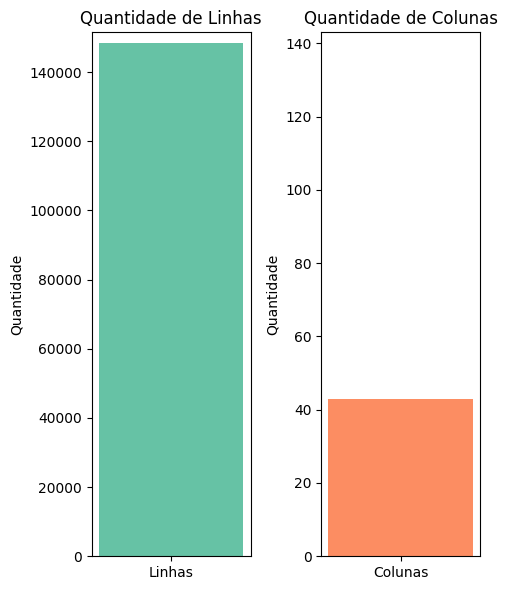

In [77]:
# Obtendo o tamanho do DataFrame
num_rows, num_cols = df.shape

# Criando gráfico de barras para linhas
plt.figure(figsize=(5, 6))

# Gráfico de barras para Linhas
plt.subplot(1, 2, 1)
plt.bar(['Linhas'], [num_rows], color='#66c2a5')
plt.title('Quantidade de Linhas')
plt.ylabel('Quantidade')
plt.ylim(0, num_rows + 3000)  # Ajusta o limite do eixo y para melhor visualização

# Gráfico de barras para Colunas
plt.subplot(1, 2, 2)
plt.bar(['Colunas'], [num_cols], color='#fc8d62')
plt.title('Quantidade de Colunas')
plt.ylabel('Quantidade')
plt.ylim(0, num_cols + 100)  # Ajusta o limite do eixo y para que 43 apareça claramente

# Exibindo os gráficos
plt.tight_layout()  # Ajusta o layout para não sobrepor os gráficos
plt.show()

In [78]:
print("Conjunto de Treinamento")
train_df

Conjunto de Treinamento


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [79]:
print("Conjunto de Teste")
test_df

Conjunto de Teste


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_type,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [80]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

# Modelo de desenvolvimento

In [82]:
# Dividindo o conjunto de dados em 70% para treinamento e 30% para teste
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [83]:
train_df['class_type'].value_counts()


class_type
normal             53952
neptune            32085
satan               3086
ipsweep             2650
smurf               2311
portsweep           2209
nmap                1083
back                 905
guess_passwd         890
mscan                686
warezmaster          672
teardrop             628
warezclient          609
apache2              521
processtable         462
snmpguess            228
saint                219
mailbomb             207
pod                  172
snmpgetattack        127
httptunnel            88
buffer_overflow       36
multihop              18
rootkit               17
land                  13
ps                    12
named                 11
ftp_write             10
sendmail               9
loadmodule             9
xterm                  8
imap                   7
phf                    6
xlock                  5
perl                   4
xsnoop                 3
udpstorm               2
sqlattack              1
Name: count, dtype: int64

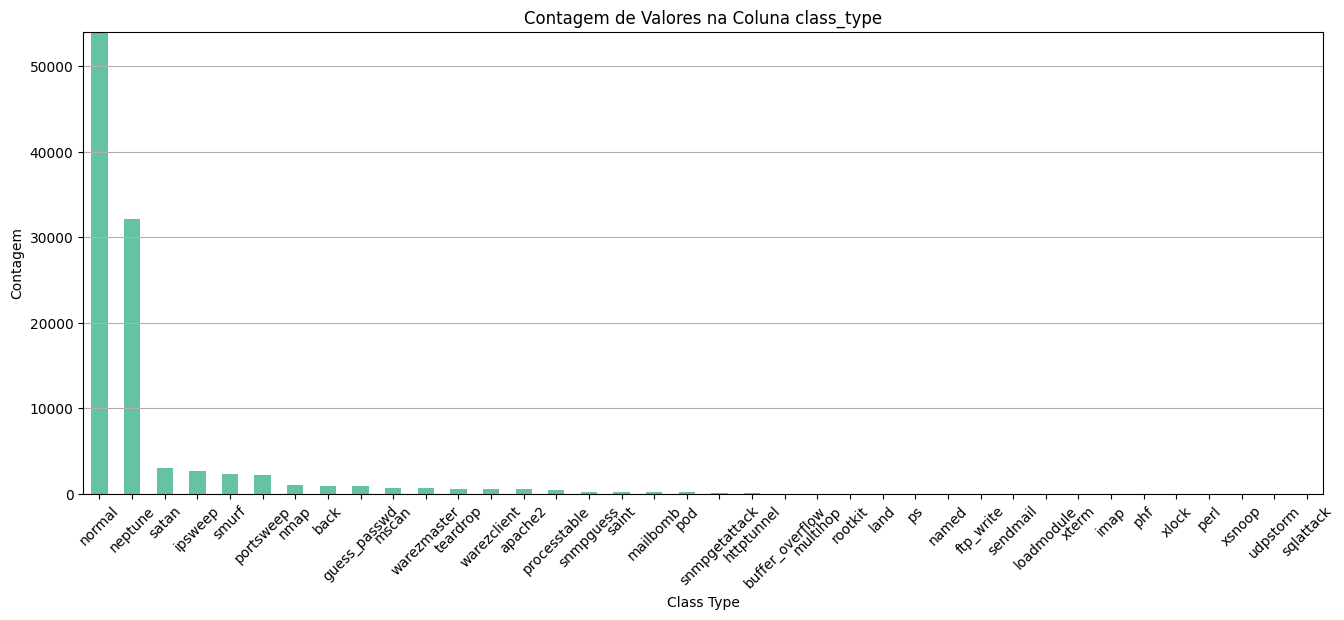

In [84]:
class_counts = train_df['class_type'].value_counts()

# Criando gráfico de barras
plt.figure(figsize=(16, 6))
class_counts.plot(kind='bar', color='#66c2a5')

# Ajustando o título e os rótulos
plt.title('Contagem de Valores na Coluna class_type')
plt.xlabel('Class Type')
plt.ylabel('Contagem')
plt.ylim(0, class_counts.max() + 50)  # Ajustando o limite do eixo y

# Exibindo o gráfico
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.grid(axis='y')  # Adiciona linhas de grade horizontais
plt.show()

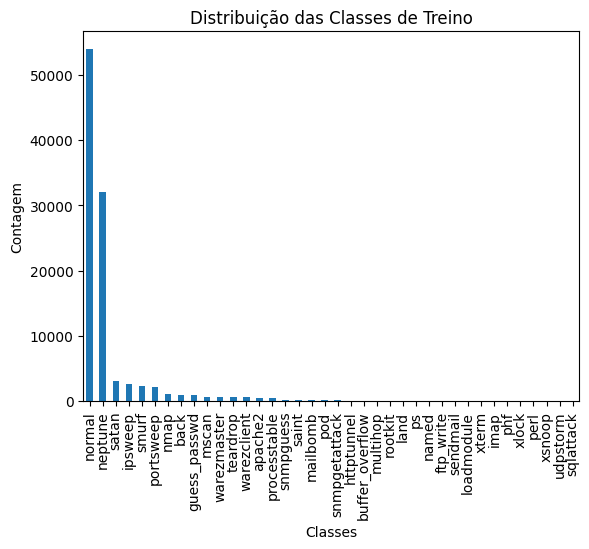

In [85]:
# distribuição dos dados nas classes 
train_df["class_type"].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes de Treino')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()


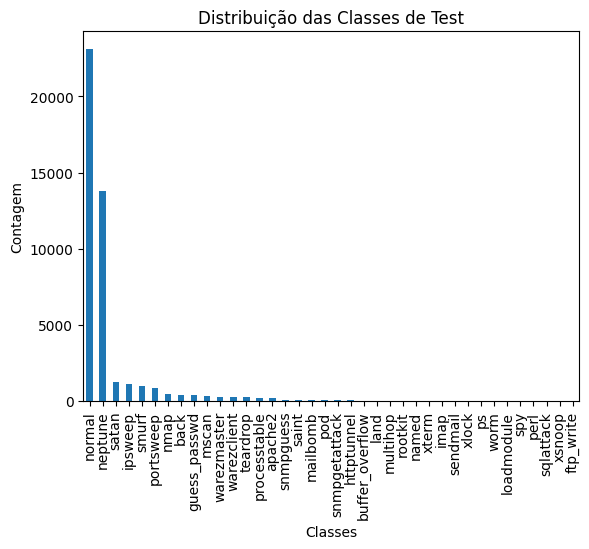

In [86]:
# distribuição dos dados nas classes 
test_df["class_type"].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes de Test')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()


In [87]:
train_df.class_type=train_df.class_type.apply(lambda x: 0 if x == 'normal' else 1)
train_df['class_type'].value_counts()



class_type
0    53952
1    50009
Name: count, dtype: int64

In [88]:
test_df.class_type=test_df.class_type.apply(lambda x: 0 if x == 'normal' else 1)
test_df['class_type'].value_counts()


class_type
0    23102
1    21454
Name: count, dtype: int64